In [58]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
raw_df = pd.read_csv("data/dataTrain_carListings.csv")
print(raw_df)

        Price  Year  Mileage State       Make        Model
0       21490  2014    31909    MD     Nissan    MuranoAWD
1       21250  2016    25741    KY  Chevrolet  CamaroCoupe
2       20925  2016    24633    SC    Hyundai        Santa
3       14500  2012    84026    OK       Jeep        Grand
4       32488  2013    22816    TN       Jeep     Wrangler
...       ...   ...      ...   ...        ...          ...
499995  16997  2013    40393    TX        BMW            1
499996  11990  2012    91794    WA    Hyundai        Santa
499997  49991  2014    39107    MS       Ford        Super
499998  21888  2010    62556    NH      Dodge          Ram
499999  63973  2017    17653    NJ  Chevrolet  Suburban4WD

[500000 rows x 6 columns]


The data provided has 6 columns and 500000 samples.

## Exploratory Data Analysis

In [8]:
raw_df.shape

(500000, 6)

In [9]:
raw_df.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

The features are namely: Make, Model, State, Mileage, Year and finally what we have to predict, i.e. Price.

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    500000 non-null  int64 
 1   Year     500000 non-null  int64 
 2   Mileage  500000 non-null  int64 
 3   State    500000 non-null  object
 4   Make     500000 non-null  object
 5   Model    500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


As we can clearly see there is no null values in either of the columns. Further, there are three numerical attributes and three categorical attributes.

### Categorical Attributes

In [14]:
# Categorical Attributes
categorical_ = [col for col in raw_df.columns if raw_df[col].dtype=='O']
print("There are {} categorical attributes: {}".format(len(categorical_),categorical_))

There are 3 categorical attributes: ['State', 'Make', 'Model']


In [18]:
raw_df[categorical_].head(10)

,State,Make,Model
0,MD,Nissan,MuranoAWD
1,KY,Chevrolet,CamaroCoupe
2,SC,Hyundai,Santa
3,OK,Jeep,Grand
4,TN,Jeep,Wrangler
5,FL,Jeep,Wrangler
6,NH,Ford,F-1504WD
7,WI,Ford,ExplorerXLT
8,NY,Hyundai,Sonata4dr
9,TX,Kia,SorentoSX


In [20]:
# Confirming if there are any null values in categorical attributes
raw_df[categorical_].isnull().sum()

State    0
Make     0
Model    0
dtype: int64

In [24]:
# Frequency count of categorical attributes
for category in categorical_:
    print(category)
    print(raw_df[category].value_counts())
    print("\n")

State
 TX    57153
 CA    45643
 FL    42244
 GA    22790
 NC    22363
 IL    21058
 VA    19851
 PA    16337
 NY    15617
 NJ    15220
 OH    14171
 CO    13669
 WA    13637
 AZ    13395
 TN    11569
 MA    10753
 MD    10327
 MO     9966
 IN     9833
 KY     8331
 AL     7873
 WI     6950
 MN     6782
 MI     6677
 OK     6374
 CT     6178
 OR     6128
 UT     6095
 SC     6026
 LA     4788
 KS     4621
 NV     4134
 AR     3956
 MS     3843
 NH     3413
 NE     3150
 IA     2910
 NM     2890
 ID     2153
 DE     1520
 HI     1486
 MT     1229
 ME     1197
 RI     1065
 AK     1031
 ND      855
 WV      833
 SD      764
 VT      715
 WY      427
 DC       10
Name: State, dtype: int64


Make
Ford             78627
Chevrolet        72900
Toyota           57485
Honda            41490
Jeep             30413
GMC              25963
Kia              20347
Dodge            20178
Hyundai          18856
Lexus            17127
BMW              15367
Volkswagen       13876
Nissan           13168

In [29]:
# Number of unique values of each categorical attribute:
for category in categorical_:
    print(category, "has", raw_df[category].nunique(), "labels")

State has 51 labels
Make has 38 labels
Model has 525 labels


As we see that the "State" attribute has 51 unique labels, we can perform one-hot encoding on the State attribute.

In [32]:
# One-hot encoding on the "state" attribute
pd.get_dummies(raw_df['State'],drop_first=True).head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Here, we have drop_first=True because for a particular row(sample) if all these columns have 0 as its value, it correspond to the first label which has been removed.


In [34]:
# Finding the count of each label can be verified by summing over column
pd.get_dummies(raw_df["State"],drop_first=True).sum(axis=0)

 AL     7873
 AR     3956
 AZ    13395
 CA    45643
 CO    13669
 CT     6178
 DC       10
 DE     1520
 FL    42244
 GA    22790
 HI     1486
 IA     2910
 ID     2153
 IL    21058
 IN     9833
 KS     4621
 KY     8331
 LA     4788
 MA    10753
 MD    10327
 ME     1197
 MI     6677
 MN     6782
 MO     9966
 MS     3843
 MT     1229
 NC    22363
 ND      855
 NE     3150
 NH     3413
 NJ    15220
 NM     2890
 NV     4134
 NY    15617
 OH    14171
 OK     6374
 OR     6128
 PA    16337
 RI     1065
 SC     6026
 SD      764
 TN    11569
 TX    57153
 UT     6095
 VA    19851
 VT      715
 WA    13637
 WI     6950
 WV      833
 WY      427
dtype: int64

Similarly, we would perform one-hot encoding on the "Make" attribute which has 38 unique labels.

In [33]:
# One-hot encoding on the "make" attribute
pd.get_dummies(raw_df['Make'],drop_first=True).head()

,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ford,...,Pontiac,Porsche,Ram,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Finding the count of each label can be verified by summing over column
pd.get_dummies(raw_df["Make"],drop_first=True).sum(axis=0)

Audi              1792
BMW              15367
Bentley             73
Buick             6132
Cadillac          6738
Chevrolet        72900
Chrysler         11402
Dodge            20178
FIAT               338
Ford             78627
Freightliner         7
GMC              25963
Honda            41490
Hyundai          18856
INFINITI          3039
Jaguar             422
Jeep             30413
Kia              20347
Land              3397
Lexus            17127
Lincoln           2168
MINI              3497
Mazda             2952
Mercedes-Benz     9497
Mercury            325
Mitsubishi        1623
Nissan           13168
Pontiac            397
Porsche           1200
Ram               4520
Scion              800
Subaru            8499
Suzuki              49
Tesla              187
Toyota           57485
Volkswagen       13876
Volvo             2159
dtype: int64

### Numerical Attributes

In [49]:
# Numerical Attributes
Numerical_ = [col for col in raw_df.columns if raw_df[col].dtype!='O']
print("There are {} numerical attributes: {}".format(len(Numerical_),Numerical_))

There are 3 numerical attributes: ['Price', 'Year', 'Mileage']


In [50]:
raw_df[Numerical_].head(10)

,Price,Year,Mileage
0,21490,2014,31909
1,21250,2016,25741
2,20925,2016,24633
3,14500,2012,84026
4,32488,2013,22816
5,37944,2017,5362
6,18995,2010,69431
7,28000,2015,35090
8,10995,2012,35100
9,32991,2017,14238


In [51]:
# Confirming if there are any null values in numerical attributes
raw_df[Numerical_].isnull().sum()

Price      0
Year       0
Mileage    0
dtype: int64

We see that there are no null values in the year as well. So, even though the "Year" is in integer format, we *do not need to* treat it like numerical attribute as it indicates the year in which the car was bought firsthand.

Now, we aim to find the summary statistics of the remaining two numerical attributes

In [52]:
# Removing the "Year" attribute from the numerical attributes and adding it to categorical attributes
Numerical_.remove("Year")
categorical_.append("Year")

In [55]:
print(round(raw_df[Numerical_].describe()),2)

          Price    Mileage
count  500000.0   500000.0
mean    21144.0    55076.0
std     10753.0    40897.0
min      5001.0        5.0
25%     13499.0    25855.0
50%     18450.0    42990.0
75%     26998.0    77406.0
max     79999.0  2457832.0 2


We can observe that the mean and standard deviation is almsot equal for the columns, "Price" and "Mileage". So, we can estimate that there might be many outliers in these columns.

We can visualize the outliers using boxplots and hence we will plot boxplots for "Price" and "Mileage" to gain understanding about the numerical attributes

Text(0, 0.5, 'Mileage')

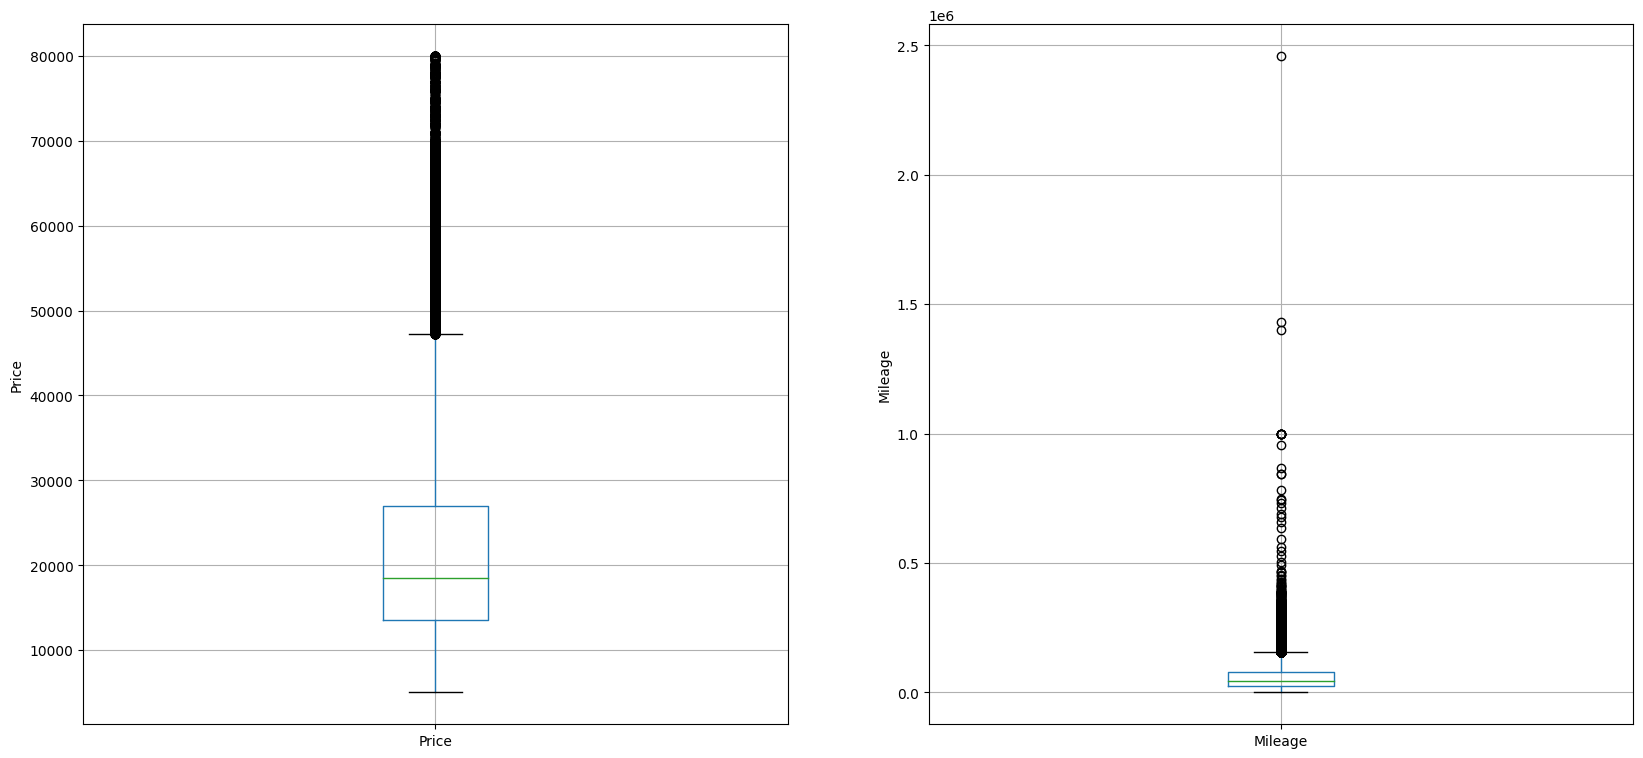

In [61]:
# Boxplots to visualize outliers

plt.figure(figsize=(20,20))


plt.subplot(2, 2, 1)
fig = raw_df.boxplot(column='Price')
fig.set_title('')
fig.set_ylabel('Price')


plt.subplot(2, 2, 2)
fig = raw_df.boxplot(column='Mileage')
fig.set_title('')
fig.set_ylabel('Mileage')

Here, the centerline denotes the median of the data whereas the upper line and lower line define 3rd quartile(75%) and 1st quartile(25%) of respective columns.

We observe that there are very large amount of outliers in both the columns and it is important to note that the outliers are only occuring above the 3rd quartile whereas there are zero outlier below the 1st quartile range. 